In [1]:

import math
import random
import pickle
import h5py
import glob
import os
import json
import pandas as pd
import sys
import getpass
import csv
import logging
import datetime
import json
import cv2
import imageio 
import ipywidgets as widgets
import numpy as np
from numpy import exp, linspace, meshgrid
from skimage import io

from pathlib import Path

import scipy
from scipy.special import jn
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
from scipy import stats
from scipy import signal

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure
from matplotlib import cm
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
#from matplotlib.widgets import Button
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle
from matplotlib.widgets import Slider, Button, RadioButtons
  
username = getpass.getuser()
CODE_folder = '/Users/cebals01/Dropbox/_nPROJECTS/GitHub/_main/'
sys.path.append(CODE_folder)

import behavior
import twophoton_mapping
import twophoton_behavior
import onephoton_imaging

from onephoton_imaging import recordings
from onephoton_imaging import latency_and_ranking

import Defs_behavior_files as dBFiles
import Defs_behavior_odors as dBOdors
import Defs_behavior_data as dBData
import Defs_behavior_plots as dBPlots
import Defs_behavior_sniff as dBSniff

import ast

Defs_Imaging LOADED
fromPC: False
readfrom: HardDrive
main_code_folder: /Users/cebals01/Dropbox/_nPROJECTS/Olfaction/_CODE/_Data/
main_data_folder: /Volumes/SC_DATA/Olfaction/_DATA/Behavior/


# List of diff types of experiments

## A- 1P widefield imaging (Passive)

### A.1 - Preprocess
### A.2 - After preprocessing: Simple vizualizations
### A.3 - After preprocessing: Latency and Ranking

# List of functions in onephoton_imaging

## A- 1P widefield imaging

--> recordings()
# analysis
load_h5file
load_odors_names
load_odors_keys
load_odors_keys_x_trial
load_alltrials_arrays
load_alltrials_tiffs
load_alltrials_dict
load_alltrials_sniff
load_alltrials_triggers
load_alltrials_traces_aligned_to_sniff
load_odors_responses
load_odors_responses_withdilutors
load_rec_rois

# preprocessing
genereate_datadict_from_session
generate_odorsfiles_from_session
generate_odors_keys
generate_odors_keys_v2
generate_or_load_TIFFs
generate_figs_for_each_pdTrial
generate_data_aligned_with_sniff
generate_odors_responses_1P
further_process_odors_responses_1P_withDilutor
generate_odors_responses_2P
further_process_odors_responses_2P_withDilutor
generate_ref_image_from_first_trial
generate_allframestif
generate_allframestif_withDilutor

#plot
plot_allOdors_meanresp
plot_oneOdor_allreps
plot_checking_contamination_empty_after_odor

#Helpers
_open_image
_take_rois_from_folder
_extract_rois_fluo
_read_camfiles
_read_trial_from_tif
_read_one_tiff

--> alignment_several_recordings()
__init__
step1a_generatedict_allrecordings
step1b_load_prealignment_dicallrecordings
step2a_aling_to_common_odor
step2b_load_dict_for_aligment
step3a_load_alldata_for_generate_aligned_odor_responses
step3b_generate_aligned_odor_responses
step3c_load_aligned_odor_responses
step4a_generate_rois_meanreps
step5a_generate_imgs_meanreps
_open_image
_take_rois_from_newalignment


In [ ]:
# A.1 preprocessing

mouse_name = 'SC851'
rec_idx = 1
rig = '1P'
data_img_size = 256

rec_key = mouse_name + '_' + str(rec_idx).zfill(2)
c_rec = recordings(rig = rig, mouse_name = mouse_name, rec_key = rec_key)  
c_rec.genereate_datadict_from_session()

data_structure = c_rec.data_structure 
data_behavior = c_rec.data_behavior 
bool_DMD_structure = c_rec.bool_DMD_structure

datapd = c_rec.session_datapd
data_structure = c_rec.data_structure
data_behavior = c_rec.data_behavior

od4d, ni4d = dBOdors.get_odors_from_pd(datapd, idx_Trials = [], structure = data_structure + '_' + data_behavior, read_all = True)
    
try:
    odorset1_dil_air = datapd.iloc[:]['olfa_dil_air']
    odorset1_dil_vac = datapd.iloc[:]['olfa_dil_vac']
except KeyError:
    pass

c_rec.genereate_datadict_from_session()
c_rec.generate_odorsfiles_from_session(data_structure + '_' + data_behavior, DMD_structure = bool_DMD_structure)
c_rec.generate_odors_keys(DMD_structure = bool_DMD_structure)

c_rec.generate_or_load_TIFFs()
allodors_tiff_as_arrays_keys_list = c_rec.session_data['alltrials_odors_keys']

c_rec.load_alltrials_arrays()
c_rec.generate_data_aligned_with_sniff(img_size = data_img_size)
c_rec.generate_odors_responses_1P()


done
/Volumes/SC_DATA/Olfaction/1P_data/SC12/01_210803/8odors
load_odors_responses session_data_responses_folder /Volumes/SC_DATA/Olfaction/1P_data/SC12/01_210803/8odors/DATA/responses
/Volumes/SC_DATA/Olfaction/1P_data/SC12/01_210803/8odors/DATA/responses/dict_odor_responses
done


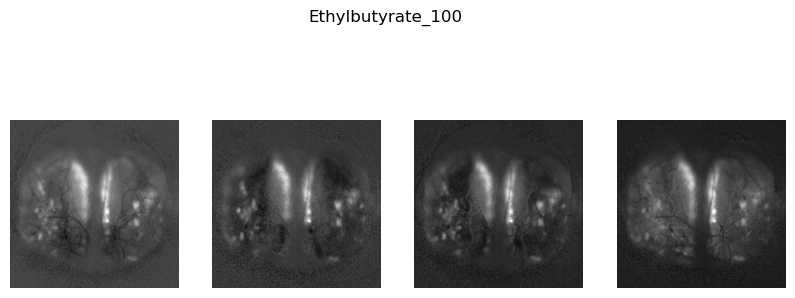

In [ ]:
# A.2 // After preprocessing // old_data
mouse_name = 'SC12'
rec_idx = 1
rig = '1P'
check_trials = False

rec_key = mouse_name + '_' + str(rec_idx).zfill(2)
c_rec = recordings(rig = rig, mouse_name = mouse_name, rec_key = rec_key)  
c_rec.genereate_datadict_from_session()
print(c_rec.session_folder)

if check_trials:
    c_rec.load_alltrials_tiffs()

c_rec.load_odors_responses()
dict_odor_responses = c_rec.session_dict_odors_responses
allodorkeys = list(dict_odor_responses.keys())

'''
dict_odor_responses['PropionicAcid_100']
['tr_idxs', 'mean_odor_resp', 'allreps_mean_odor_resp', 'allreps_full_odor_resp']
'''

c_rec.plot_oneOdor_allreps(allodorkeys[2])

done
load_odors_responses session_data_responses_folder /Volumes/SC_DATA/Olfaction/1P_data/SC91/01_250421/SC91_6odors_1rep/DATA/responses
/Volumes/SC_DATA/Olfaction/1P_data/SC91/01_250421/SC91_6odors_1rep/DATA/responses/dict_odor_responses
done
0 2MBA_100
1 EthylTiglate_100
2 Ethylbutyrate_100
3 HeptanoicAcid_100
4 Hexanal_100
5 MVT_100
6 empty_100


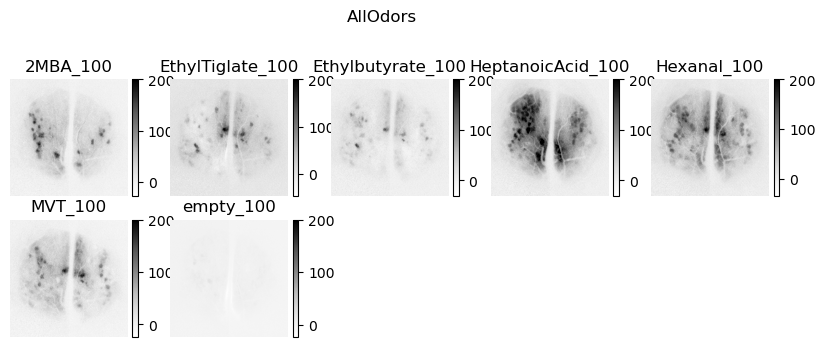

In [ ]:
# A.2 // After preprocessing // newer_data

mouse_name = 'SC91'
rec_idx = 1
rig = '1P'

rec_key = mouse_name + '_' + str(rec_idx).zfill(2)
c_rec = recordings(rig = rig, mouse_name = mouse_name, rec_key = rec_key)  
c_rec.genereate_datadict_from_session()

c_rec.load_odors_responses()
dict_odor_responses = c_rec.session_dict_odors_responses
allodorkeys = list(dict_odor_responses.keys())
c_rec.plot_allOdors_meanresp()

#TODO
# explore more the data
# sniff 

In [ ]:
# A.3 // After preprocessing // Latency and Ranking

mouse_name = 'SC65'
rec_idx = 20
rankandlat = latency_and_ranking(mouse_name = mouse_name,rec_idx = rec_idx)  
rankandlat.onerec_morphing_curve02_latency_and_ranking()            
dict_odors_responses = rankandlat.recording.session_dict_odors_responses

dict_inforeps_data = np.array(rankandlat.dict_data_used_for_latency['arr_with_reps']).astype(int)
arr_fulldata = rankandlat.arr_allodors_allframes_meanreps_nbsln   
      
file, camframes, bv_avg_frames = rankandlat.recording.generate_ref_image_from_first_trial()   
rankandlat.save_as_sparsematrix(arr_fulldata)
rankandlat.load_arr_morphingdata_from_sparsematrix(arr_fulldata)

rankandlat.load_rois_from_rec()
rec_dic_ROIs = rankandlat.rec_dic_ROIs

rankandlat.extract_ranking_and_latency()

dRanking = rankandlat.dRanking 
rois_variables = rankandlat.rois_variables 


In [ ]:


hardrive = 'Extreme SSD' 
folder_to_save = f'/Volumes/{hardrive}/Olfaction/2P_data/'
mouse_name = 'SC092'
layerkey = 'GLOM'
rec_key_json = 'SC092_07'
exp_type = 'LightMapping'
preprocess = True

Obj = twophoton_mapping.MappingStimObj(mouse_name = mouse_name,
                                       rec_key_json = rec_key_json,
                                       exp_type = exp_type)

Obj._generate_session_params()
Obj.layerkey = layerkey

rec_folder = Obj.sessions_params[mouse_name][layerkey][rec_key_json]["rec_folder"]

Obj._info_stim_idxs()
rec_idx = Obj.rec_idx
n_reps = getattr(Obj, f'rec_{rec_idx}_stimreps')
n_stims = getattr(Obj, f'rec_{rec_idx}_nstims' )
stims_idxs = getattr(Obj, f'rec_{rec_idx}_lightstims_trialidxs')

if preprocess:
    
    Obj._check_folders()
    Obj._preprocess_mapping_step1(savefigplot = True, savearr = True)
    Obj._preprocess_mapping_step2()

Obj._load_recdatadict()
dict_allstims_MeanImgs_allreps = getattr(Obj,f'rec_{Obj.rec_idx}_dict_avg_images_allstims')

Obj._load_first_trial_fromtiff_for_refimg()
glomlayer_RefImg = getattr(Obj,f'rec_{Obj.rec_idx}_RefImg')

Obj._load_ROIS_UsedforStimulation()

Obj.plot_rec_refimg_withStimRois(ref_img = glomlayer_RefImg, plot_rois = True, pcmap = 'rainbow')

Obj.plot_rec_StimFrame()
Obj.plot_rec_allStims_ResponseImg()

if preprocess:
    
    Obj._extract_allStims_ROISTraces()
    dict_allstims_ROISTraces_allreps = getattr(Obj, f'rec_{Obj.rec_idx}_dict_allstims_ROISTraces_allreps')

Obj._load_dict_allstims_ROISTraces_allreps()
dict_allstims_ROISTraces_allreps = getattr(Obj, f'rec_{Obj.rec_idx}_dict_allstims_ROISTraces_allreps')

Obj._postprocessing_datasummary()

## B - 2P imaging (Passive)

In [ ]:
# B2 - Load after processing // new data 

mouse_name = 'SC953'
rec_idx = 5
rig = '2P'
data_img_size = 512

rec_key = mouse_name + '_' + str(rec_idx).zfill(2)
c_rec = recordings(rig = rig, mouse_name = mouse_name, rec_key = rec_key)  
c_rec.genereate_datadict_from_session()

data_structure = c_rec.data_structure 
data_behavior = c_rec.data_behavior 
bool_DMD_structure = c_rec.bool_DMD_structure

c_rec.load_h5file()
datapd = c_rec.session_datapd

od4d, ni4d = dBOdors.get_odors_from_pd(datapd, idx_Trials = [], structure = data_structure + '_' + data_behavior, read_all = True)
    
try:
    odorset1_dil_air = datapd.iloc[:]['olfa_dil_air']
    odorset1_dil_vac = datapd.iloc[:]['olfa_dil_vac']
except KeyError:
    pass

c_rec.generate_odorsfiles_from_session(data_structure + '_' + data_behavior, DMD_structure = bool_DMD_structure)
c_rec.generate_odors_keys_v2(DMD_structure = bool_DMD_structure)

c_rec.generate_or_load_TIFFs()
allodors_tiff_as_arrays_keys_list = c_rec.session_data['alltrials_odors_keys']

c_rec.generate_data_aligned_with_sniff(img_size = data_img_size)
c_rec.generate_odors_responses_2P()

c_rec.load_odors_responses()
dict_odors_responses = c_rec.session_dict_odors_responses

c_rec.plot_allOdors_meanresp()


NameError: name 'recordings' is not defined

## C - 2P imaging and behavior

In [ ]:
# C2 - Load data


mouse_name = 'SC092'
rec_key_json = 'SC092_08'
exp_type = 'behavior'
layer_key = 'GLOM'
generate_dictofimgs_by_conds = False
extract_odor_recordings = False

# Analysis
Obj = twophoton_behavior.behavior2PImagingObj(mouse_name = mouse_name,      
                                              rec_key_json = rec_key_json,
                                              exp_type = exp_type)
Obj._generate_session_params()
Obj.layer_key = layer_key
Obj._load_session_params()
Obj._load_recording()
Obj._load_behavior_byStimID()
dict_behavior_by_stimID = Obj.dict_behavior_by_stimID
stimidKeys = dict_behavior_by_stimID.keys()

Obj._extract_behavior_byStimID()
    
Obj._load_behavior_byStimID()
dict_behavior_by_stimID = Obj.dict_behavior_by_stimID 
dict_behavior_by_stimID.keys()

sessions_params = Obj.sessions_params

Obj._load_first_trial_fromtiff_for_refimg()
rec_1_glomlayer_refimg = Obj.rec_RefImg

Obj._load_ROISLightStims_fromFolder()
Obj.plot_rec_refimg_withStimRois(ref_img = rec_1_glomlayer_refimg, plot_rois = True, pcmap = 'rainbow')

if extract_odor_recordings:
    
    Obj._generate_dictofimgs_odors_by_cond(twovialsxodor = False, flows = [10,50,100], applycorrection = True)

    Obj._extract_odor_from_dict_odors_by_cond(odor_list = ['empty'], odor_flows_list = [100])
    Obj._extract_odor_from_dict_odors_by_cond(odor_list = ['2MBA'], odor_flows_list = [10,50,100])
    Obj._extract_odor_from_dict_odors_by_cond(odor_list = ['EthylTiglate'], odor_flows_list = [10,50,100])


odor_idx = 0
odor_keyname = 'empty'
Obj._load_dict_odor_responses(odor_idx, odor_keyname)
dict_odor0_allflows_bystimID = getattr(Obj, f'odor{odor_idx}_dict_avgimgs_byStim')

odor_idx = 1
odor_keyname = 'EthylTiglate'
Obj._load_dict_odor_responses(odor_idx, odor_keyname)
dict_odor1_allflows_bystimID = getattr(Obj, f'odor{odor_idx}_dict_avgimgs_byStim')

odor_idx = 2
odor_keyname = '2MBA'
Obj._load_dict_odor_responses(odor_idx, odor_keyname)
dict_odor2_allflows_bystimID = getattr(Obj, f'odor{odor_idx}_dict_avgimgs_byStim')

odor_idxs = [0,1,2]
odor_list = ['empty','EthylTiglate','2MBA']
Obj._extract_ROISTraces(odor_idxs,odor_list)
